In [5]:
""" Inflation Prediction Study
Author: Camilla Nore
        Trygve Utstumo
Date:   2015-08-30
"""
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

#%matplotlib notebook
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0)

# NB: As this is iPython, the module will be cached. If you change 
#     the module, you have to restart the iPython kernel.
from inflastudy import InflaData  # Custom module for this study.

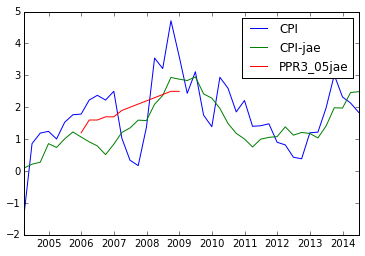

In [6]:
data = InflaData.InflaData(filename='data/kongepanel_upd_ark_A.csv')
#print data.raw_data.CPI       # Uncomment this line to see raw CPI data.
#print data.raw_data.columns   # Uncomment this line to see column names.
# Column names wo special characters can be accessed as object members, e.g.: raw_data.CPI
plt.plot(data.raw_data.index, data.raw_data.CPI,label='CPI')
plt.hold(True)
# Column names with special characters need to be accessed by key, e.g.: raw_data['CPI-jae']
plt.plot(data.raw_data.index, data.raw_data['CPI-jae'],    label='CPI-jae')
plt.plot(data.raw_data.index, data.raw_data['PPR3_05jae'], label='PPR3_05jae')
plt.legend()

['PPR3_05jae', 'PPR1_06jae', 'PPR2_06jae', 'PPR3_06jae', 'PPR1_07jae', 'PPR2_07jae', 'PPR3_07jae', 'PPR1_08jae', 'PPR2_08xe', 'PPR3_08xe', 'PPR4_08xe', 'PPR1_09xe', 'PPR2_09xe', 'PPR3_09xe', 'PPR1_10xe', 'PPR2_10xe', 'PPR3_10xe', 'PPR1_11xe', 'PPR2_11xe', 'PPR3_11xe', 'PPR1_12xe', 'PPR2_12xe', 'PPR3_12xe', 'PPR1_13xe', 'PPR2_13xe', 'PPR3_13xe', 'PPR4_13xe', 'PPR1_14xe', 'PPR2_14xe', 'PPR3_14xe', 'PPR4_14xe', 'PPR1_15xe', 'PPR2_15xe', 'CPI-jae']


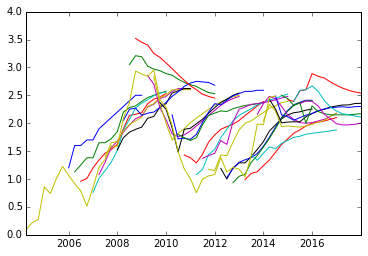

In [8]:
plt.figure('All jae predictions')
jae_columns = []
for col in data.raw_data.columns:
    if ('xe' in col) or ('jae' in col):
        jae_columns.append(col)
        plt.plot(data.raw_data.index,
                 data.raw_data[col],
                 label=col)

print jae_columns
jae_columns.remove('CPI-jae')

In [ ]:
#How to find the vector of predictions one quarter ahead
for t in data.raw_data.index:
    for col in jae_columns:
        value = data.raw_data.loc[t,col]
        if not math.isnan(value):
            # This is a start, but def not correct
            # Maybe because the jae columns are not sorted correctly?
            data.raw_data.loc[t, 'firstpred'] = value
            data.raw_data.loc[t, 'firstpred_']
        break # stop the loop on the first valid prediction
        
print data.raw_data.firstpred
plt.figure('First prediction')
plt.plot(data.raw_data.index,
        data.raw_data['CPI-jae'])

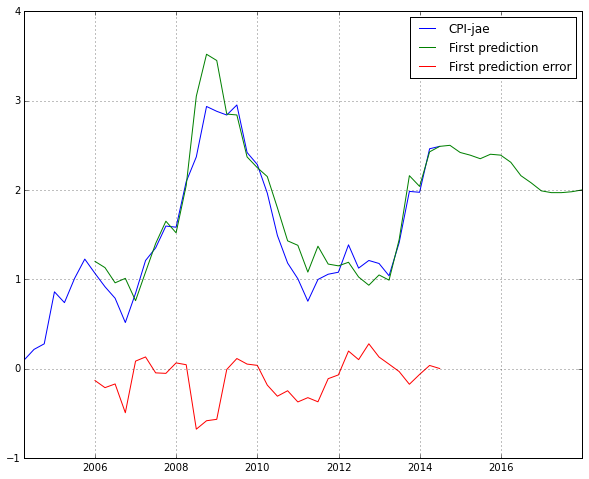

In [11]:
# How to find the vector of predictions one quarter ahead

for t in data.raw_data.index:
    for col in jae_columns:
        value = data.raw_data.loc[t,col]
        if not math.isnan(value):
            data.raw_data.loc[t,'firstpred'] = value
            data.raw_data.loc[t,'firstpred_src'] = col
            # Do not stop the loop on the first column, but rather
            # use the last column with a valid number.
            # We have to think a bit on how to get the other predictions
            # with longer horizons, should probably make a list of these.
            # An option is to work on the reverse list of columns, and add 
            # with longer prediction horizons..
            
plt.figure('First prediction',figsize=(10,8))
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae'],
         label='CPI-jae')
plt.plot(data.raw_data.index,
         data.raw_data.firstpred,
         label='First prediction')
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae']-data.raw_data.firstpred,
         label='First prediction error')
plt.legend()
plt.grid(True)
# Print the plotted data, so it can be verified towards
# the excel source data.
#print data.raw_data.loc[:,['firstpred','firstpred_src']]

# Regn ut square errors på den lista her.